# AuTextification

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from py3langid.langid import LanguageIdentifier, MODEL_FILE
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from scipy.sparse import csr_matrix
from lingua import Language, LanguageDetectorBuilder
from sklearn.metrics import confusion_matrix

import warnings

# Suppress FutureWarning related to is_sparse
warnings.filterwarnings("ignore", category=FutureWarning)

Skip the preprocess (faster)

In [2]:
# root = './data/competition_2024/preprocessed_data_subtask1/'

# train_en_preprocessed = pd.read_csv(root+'train_en_preprocessed.csv')
# train_es_preprocessed = pd.read_csv(root+'train_es_preprocessed.csv')
# train_ca_preprocessed = pd.read_csv(root+'train_ca_preprocessed.csv')
# train_pt_preprocessed = pd.read_csv(root+'train_pt_preprocessed.csv')
# train_eu_preprocessed = pd.read_csv(root+'train_eu_preprocessed.csv')
# train_gl_preprocessed = pd.read_csv(root+'train_gl_preprocessed.csv')

# train_preprocessed = pd.read_csv(root+'train_preprocessed.csv')

# Preprocess

## Data

In [23]:
df = pd.read_csv('subtask1_24.csv').drop(columns='Unnamed: 0')

df.head()

,id,text,label
0,15442,Es un tribunal de suprema instanza que forma p...,generated
1,26409,Aixó de tindrer la platgeta tant prou era un p...,human
2,12777,Doug mcadam es un científico estadista estadou...,generated
3,63467,"El president de la generalitat, carles puigdem...",generated
4,41050,"Traídas de francia, tan estrafalarias que una ...",generated


## Identifying languages

In [11]:
identifier = LanguageIdentifier.from_pickled_model(MODEL_FILE)
identifier.set_languages(['en', 'es', 'pt', 'gl', 'eu', 'ca'])
languages = [Language.ENGLISH, Language.BASQUE, Language.CATALAN, Language.SPANISH, Language.PORTUGUESE]
detector = LanguageDetectorBuilder.from_languages(*languages).build()

# English (en)
# Spanish (es)
# Portuguese (pt)
# Galician (gl)
# Basque (eu)
# Catalan (ca)

detector.detect_language_of(df.loc[0, 'text'])
identifier.classify(df.loc[0, 'text'])

('ca', -4691.199)

In [12]:
def check_language(text):
    language = detector.detect_language_of(text)
    if language == Language.CATALAN:
        return 'ca'
    elif language == Language.SPANISH:
        return 'es'
    elif language == Language.BASQUE:
        return 'eu'
    elif language == Language.PORTUGUESE:
        return 'pt'
    elif language == Language.ENGLISH:
        return 'en'
    
def detect_language(text):
    return identifier.classify(text)[0]

,id,text,label,detected_language,check_language
0,15442,Es un tribunal de suprema instanza que forma p...,generated,ca,ca
1,26409,Aixó de tindrer la platgeta tant prou era un p...,human,ca,ca
2,12777,Doug mcadam es un científico estadista estadou...,generated,es,es
3,63467,"El president de la generalitat, carles puigdem...",generated,ca,ca
4,41050,"Traídas de francia, tan estrafalarias que una ...",generated,es,es
...,...,...,...,...,...
109658,76637,"Bere burua egokitzen saiatu zuen, aurreko mome...",generated,eu,eu
109659,107183,"Benquerida compañeira e amiga, para nós é moi ...",human,gl,pt
109660,144741,"The irish president has signed the ""long-await...",generated,en,en
109661,1202,"Pedro de alvarado y contreras ""tonatiuh"" (bada...",human,es,es


In [24]:
df['detected_language'] = df['text'].apply(detect_language)
df['check_language'] = df['text'].apply(check_language)

df

,id,text,label,detected_language,check_language
0,15442,Es un tribunal de suprema instanza que forma p...,generated,ca,ca
1,26409,Aixó de tindrer la platgeta tant prou era un p...,human,ca,ca
2,12777,Doug mcadam es un científico estadista estadou...,generated,es,es
3,63467,"El president de la generalitat, carles puigdem...",generated,ca,ca
4,41050,"Traídas de francia, tan estrafalarias que una ...",generated,es,es
...,...,...,...,...,...
109658,76637,"Bere burua egokitzen saiatu zuen, aurreko mome...",generated,eu,eu
109659,107183,"Benquerida compañeira e amiga, para nós é moi ...",human,gl,pt
109660,144741,"The irish president has signed the ""long-await...",generated,en,en
109661,1202,"Pedro de alvarado y contreras ""tonatiuh"" (bada...",human,es,es


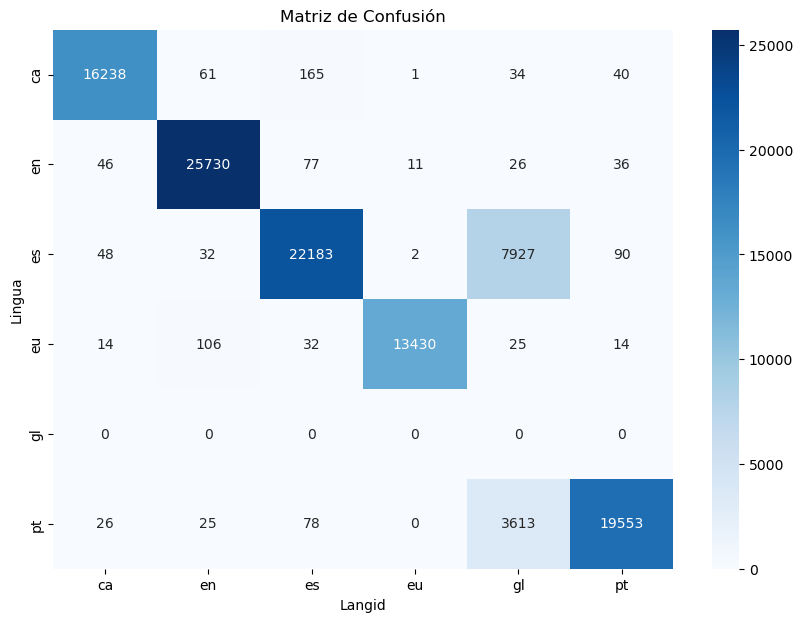

In [25]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

languages_detected = sorted(df['detected_language'].unique())
languages_check = sorted(df['check_language'].unique())
languages = sorted(set(languages_detected + languages_check))  # Unir idiomas únicos

conf_matrix = confusion_matrix(df['check_language'], df['detected_language'], labels=languages)

df['pred_correct'] = df['detected_language'] == df['check_language']


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=languages, yticklabels=languages)
plt.xlabel('Langid')
plt.ylabel('Lingua')
plt.title('Matriz de Confusión')
plt.show()

In [27]:
incorrect = df.loc[df['pred_correct'] == False]

mix_languages = incorrect.loc[incorrect['detected_language'] != 'gl']

mix_languages

,id,text,label,detected_language,check_language,pred_correct
135,130237,#bieberfever #justinbieber #belieber #purpose ...,generated,es,en,False
372,110951,Morro cabeça no tempo brasilgo udalerri bat da...,human,pt,eu,False
552,133529,¡wow! ¡qué manera de exagerar! cristiano ronal...,generated,pt,es,False
605,152580,Puigdemont reprend une paroles de rajoy pour d...,generated,en,ca,False
1151,100642,"Eu quero tanto iso! ¡vamos, lidia, non te medr...",generated,pt,es,False
...,...,...,...,...,...,...
109204,138452,Warren lambert wagner ( n. 1950 ) es un botáni...,human,en,es,False
109320,127651,"E m""encanta aquesta cançó! sempre que la sento...",generated,pt,ca,False
109437,124935,"@albertofoz que mala sorte tes, cada vez que m...",generated,es,pt,False
109557,71490,La noia de nova york és una pel·lícula estadou...,generated,ca,es,False


In [43]:
filas_borrar = mix_languages.index

# filas_borrar

train = df.drop(filas_borrar, axis=0, inplace=False)

train

,id,text,label,detected_language,check_language,pred_correct
0,15442,Es un tribunal de suprema instanza que forma p...,generated,ca,ca,True
1,26409,Aixó de tindrer la platgeta tant prou era un p...,human,ca,ca,True
2,12777,Doug mcadam es un científico estadista estadou...,generated,es,es,True
3,63467,"El president de la generalitat, carles puigdem...",generated,ca,ca,True
4,41050,"Traídas de francia, tan estrafalarias que una ...",generated,es,es,True
...,...,...,...,...,...,...
109658,76637,"Bere burua egokitzen saiatu zuen, aurreko mome...",generated,eu,eu,True
109659,107183,"Benquerida compañeira e amiga, para nós é moi ...",human,gl,pt,False
109660,144741,"The irish president has signed the ""long-await...",generated,en,en,True
109661,1202,"Pedro de alvarado y contreras ""tonatiuh"" (bada...",human,es,es,True


In [44]:
train['label'].value_counts()

generated    58354
human        50405
Name: label, dtype: int64

In [45]:
train['detected_language'].value_counts()

en    25730
es    22183
pt    19553
ca    16238
eu    13430
gl    11625
Name: detected_language, dtype: int64

In [46]:
train_en = train[train['detected_language'] == 'en']
train_es = train[train['detected_language'] == 'es']
train_pt = train[train['detected_language'] == 'pt']
train_gl = train[train['detected_language'] == 'gl']
train_eu = train[train['detected_language'] == 'eu']
train_ca = train[train['detected_language'] == 'ca']

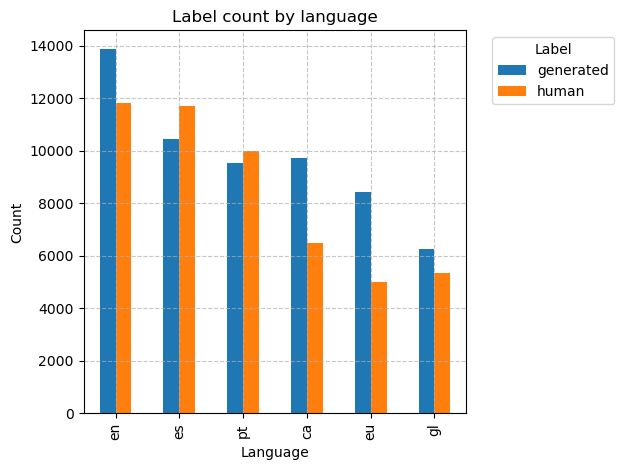

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

train_grouped = train.groupby('detected_language')['label'].value_counts().unstack().fillna(0)
train_grouped = train_grouped.loc[train_grouped.sum(axis=1).sort_values(ascending=False).index]

ax = train_grouped.plot(kind='bar', stacked=False)
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Label count by language')
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7) 
plt.tight_layout()                         # Adding style
plt.show()

In [48]:
## Checking the identifier

# Dictionary to store samples for each language
samples_by_language = {}

# Number of samples per language
samples_per_language = 10

# Iterate over each language and select random samples
for language in train['detected_language'].unique():
    language_samples = train[train['detected_language'] == language].sample(samples_per_language)
    samples_by_language[language] = language_samples

# Concatenate the sampled dataframes
sample_df = pd.concat(samples_by_language.values())

sample_df

,id,text,label,detected_language,check_language,pred_correct
62694,146997,Ja som a #sarriàdeter! avui toca congrés @erc_...,human,ca,ca,True
87591,77753,La tercera edició del festival internacional d...,human,ca,ca,True
89142,29088,Teodoric iii (c. 654 - 1 de maig de 691) va se...,generated,ca,ca,True
73679,7751,"Kate elizabeth winslet (reading, berkshire, 5 ...",human,ca,ca,True
41813,144437,Els agents de la guàrdia civil que declaren pe...,generated,ca,ca,True
42160,24466,Dorothy mcguire va ser una actriu estatunidenc...,generated,ca,ca,True
33616,95365,"L""assemblea nacional catalana (anc) ha demanat...",generated,ca,ca,True
88376,50943,La candidata de la coalició de guanyem badalon...,human,ca,ca,True
9629,45344,"Carla del ponte (9 de febrer de 1947, lugano, ...",human,ca,ca,True
25393,100334,"¡quina bona notícia! aniré a l""aigua també per...",generated,ca,ca,True


## Preprocess data

In [49]:
with open('stopwords_galician.txt', 'r') as file:
    stopwords_galician_1 = [line.strip() for line in file.readlines()]
    stopwords_galician_1 = set(stopwords_galician_1)


In [50]:
# https://github.com/stopwords-iso/stopwords-gl/blob/master/stopwords-gl.txt
with open('stopwords-gl.txt', 'r') as file:
    stopwords_galician_2 = [line.strip() for line in file.readlines()]
    stopwords_galician_2 = set(stopwords_galician_2)

In [51]:
stopwords_galician = stopwords_galician_1|stopwords_galician_2

In [52]:
import string
from nltk.corpus import stopwords

# import these modules
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

 

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = set()
    # Galician stop words --> https://github.com/Xangis/extra-stopwords/blob/master/galician
    for lan in ['english', 'catalan', 'spanish', 'basque', 'portuguese']:
        STOPWORDS = STOPWORDS|set(stopwords.words(lan))|stopwords_galician
    
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    nostop =  ' '.join([word.lower() for word in nopunc.split() if word.lower() not in STOPWORDS and word.isalnum()])
    
    # choose some words to be stemmed
#     ps = PorterStemmer()
#     stem  =  ' '.join([ps.stem(word) for word in nostop.split()])
    return nostop

# import nltk 
# nltk.download('stopwords') # # -> do this in case of 'Resource stopwords not found.'


def preprocessing(df):
    # processing text
    df.loc[:, 'clean_text'] = df['text'].apply(text_process)

    # calculate text length
    df.loc[:, 'text_len'] = df.loc[:, 'clean_text'].apply(len)
    
    # crop unnecessary columns
    df = df.drop(columns=['text', 'detected_language'])

    # map labels
    df['label'] = df['label'].map({'human': 0, 'generated': 1})

    return df

In [53]:
train_en_preprocessed = preprocessing(train_en)

C:\Users\naath\AppData\Local\Temp\ipykernel_716\1232925483.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'clean_text'] = df['text'].apply(text_process)
C:\Users\naath\AppData\Local\Temp\ipykernel_716\1232925483.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'text_len'] = df.loc[:, 'clean_text'].apply(len)


In [54]:
train_es_preprocessed = preprocessing(train_es)

C:\Users\naath\AppData\Local\Temp\ipykernel_716\1232925483.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'clean_text'] = df['text'].apply(text_process)
C:\Users\naath\AppData\Local\Temp\ipykernel_716\1232925483.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'text_len'] = df.loc[:, 'clean_text'].apply(len)


In [55]:
train_pt_preprocessed = preprocessing(train_pt)

C:\Users\naath\AppData\Local\Temp\ipykernel_716\1232925483.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'clean_text'] = df['text'].apply(text_process)
C:\Users\naath\AppData\Local\Temp\ipykernel_716\1232925483.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'text_len'] = df.loc[:, 'clean_text'].apply(len)


In [56]:
train_ca_preprocessed = preprocessing(train_ca)

C:\Users\naath\AppData\Local\Temp\ipykernel_716\1232925483.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'clean_text'] = df['text'].apply(text_process)
C:\Users\naath\AppData\Local\Temp\ipykernel_716\1232925483.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'text_len'] = df.loc[:, 'clean_text'].apply(len)


In [57]:
train_eu_preprocessed = preprocessing(train_eu)

C:\Users\naath\AppData\Local\Temp\ipykernel_716\1232925483.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'clean_text'] = df['text'].apply(text_process)
C:\Users\naath\AppData\Local\Temp\ipykernel_716\1232925483.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'text_len'] = df.loc[:, 'clean_text'].apply(len)


In [58]:
train_gl_preprocessed = preprocessing(train_gl)

C:\Users\naath\AppData\Local\Temp\ipykernel_716\1232925483.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'clean_text'] = df['text'].apply(text_process)
C:\Users\naath\AppData\Local\Temp\ipykernel_716\1232925483.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'text_len'] = df.loc[:, 'clean_text'].apply(len)


In [59]:
train_preprocessed = preprocessing(train)
train_preprocessed

,id,label,check_language,pred_correct,clean_text,text_len
0,15442,1,ca,True,tribunal suprema instanza forma part jurisdicc...,1016
1,26409,0,ca,True,aixó tindrer platgeta prou privilegi tenieu du...,50
2,12777,1,es,True,doug mcadam científico estadista estadounidens...,836
3,63467,1,ca,True,president generalitat carles puigdemont vicepr...,1107
4,41050,1,es,True,traídas francia estrafalarias ejemplo entretej...,281
...,...,...,...,...,...,...
109658,76637,1,eu,True,burua egokitzen saiatu aurreko momentuen gorab...,988
109659,107183,0,pt,False,benquerida compañeira amiga importante coma co...,170
109660,144741,1,en,True,irish president signed longawaiting mother bab...,1545
109661,1202,0,es,True,pedro alvarado contreras tonatiuh badajoz extr...,1773


In [60]:
# root = './data/competition_2024/preprocessed_data_subtask1/'

# train_en_preprocessed.to_csv(root+'train_en_preprocessed.csv')
# train_es_preprocessed.to_csv(root+'train_es_preprocessed.csv')
# train_ca_preprocessed.to_csv(root+'train_ca_preprocessed.csv')
# train_pt_preprocessed.to_csv(root+'train_pt_preprocessed.csv')
# train_eu_preprocessed.to_csv(root+'train_eu_preprocessed.csv')
# train_gl_preprocessed.to_csv(root+'train_gl_preprocessed.csv')

# train_preprocessed.to_csv(root+'train_preprocessed.csv')


## Exploration

In [61]:

def plot_length(corpus, lan):
    
    plt.figure(figsize=(12, 8))

    corpus[corpus.label == 0].text_len.plot(bins=35, kind='hist', color='blue', 
                                           label='Human texts', alpha=0.5)
    corpus[corpus.label == 1].text_len.plot(bins=35, kind='hist', color='red', 
                                           label='Generated texts', alpha=0.5)
    plt.xlabel("Message Length")
    plt.title(f'Texts length for {lan} language')
    plt.legend(title='Texts', bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.savefig(f'Texts length for {lan} language.png')

    plt.show()
    print(f"{lan} -> Average Human text length: {corpus[corpus.label == 0]['text_len'].mean()}")
    print(f"{lan} -> Average Computer text length: {corpus[corpus.label == 1]['text_len'].mean()}")
    print()
    


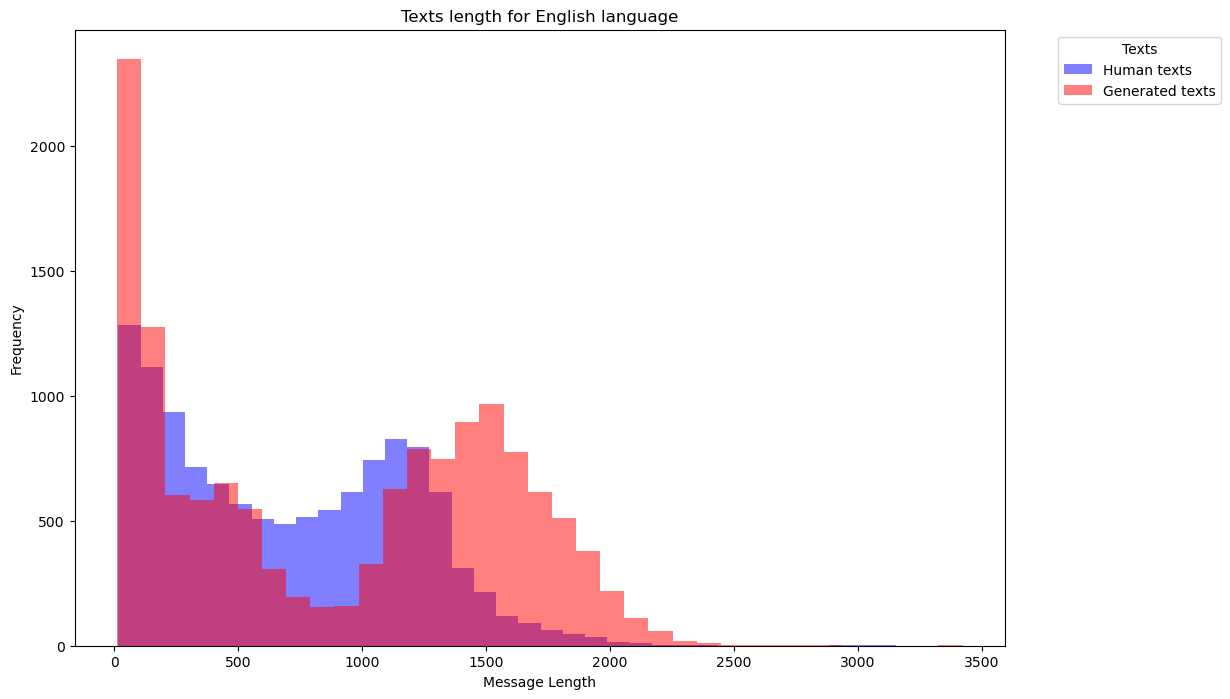

English -> Average Human text length: 703.4302984191394
English -> Average Computer text length: 902.9291417883605



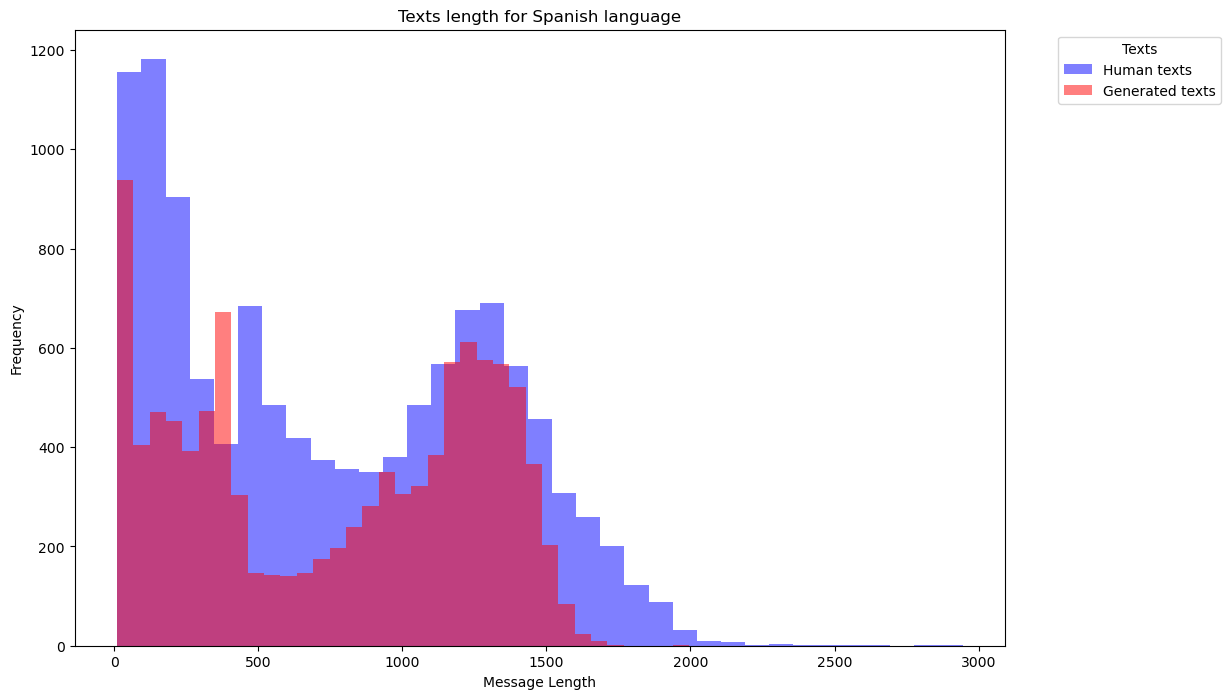

Spanish -> Average Human text length: 765.9918893537096
Spanish -> Average Computer text length: 767.4123209169054



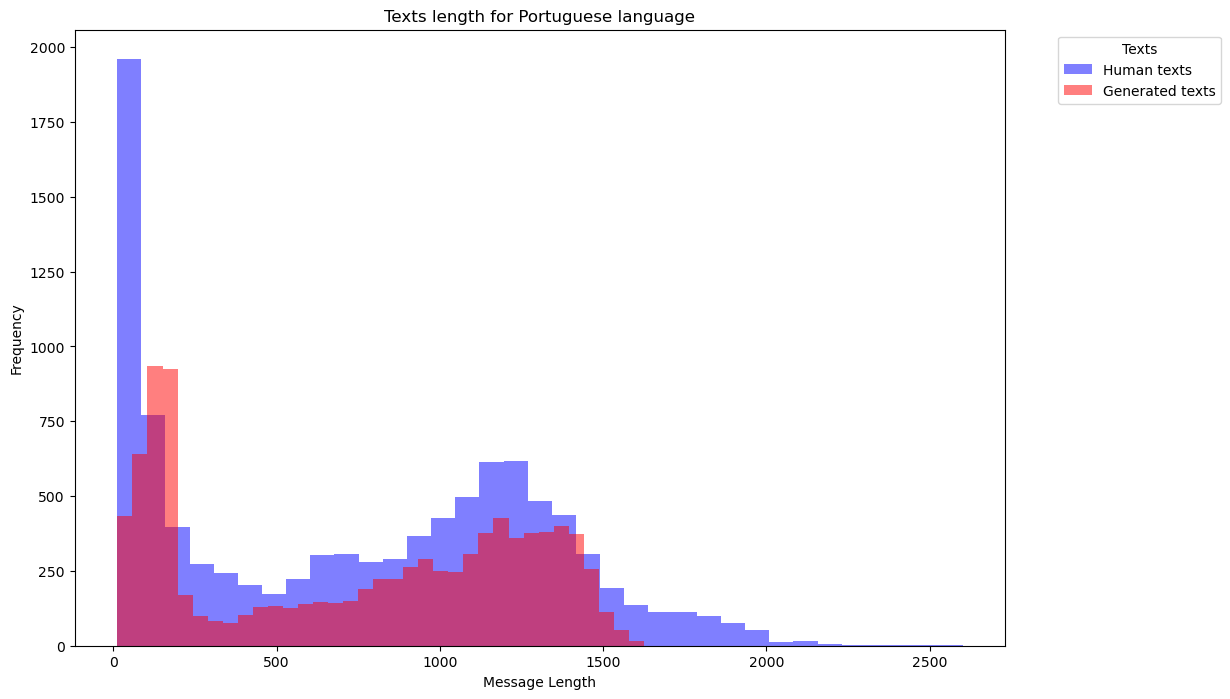

Portuguese -> Average Human text length: 749.7956226264241
Portuguese -> Average Computer text length: 738.6347543731015



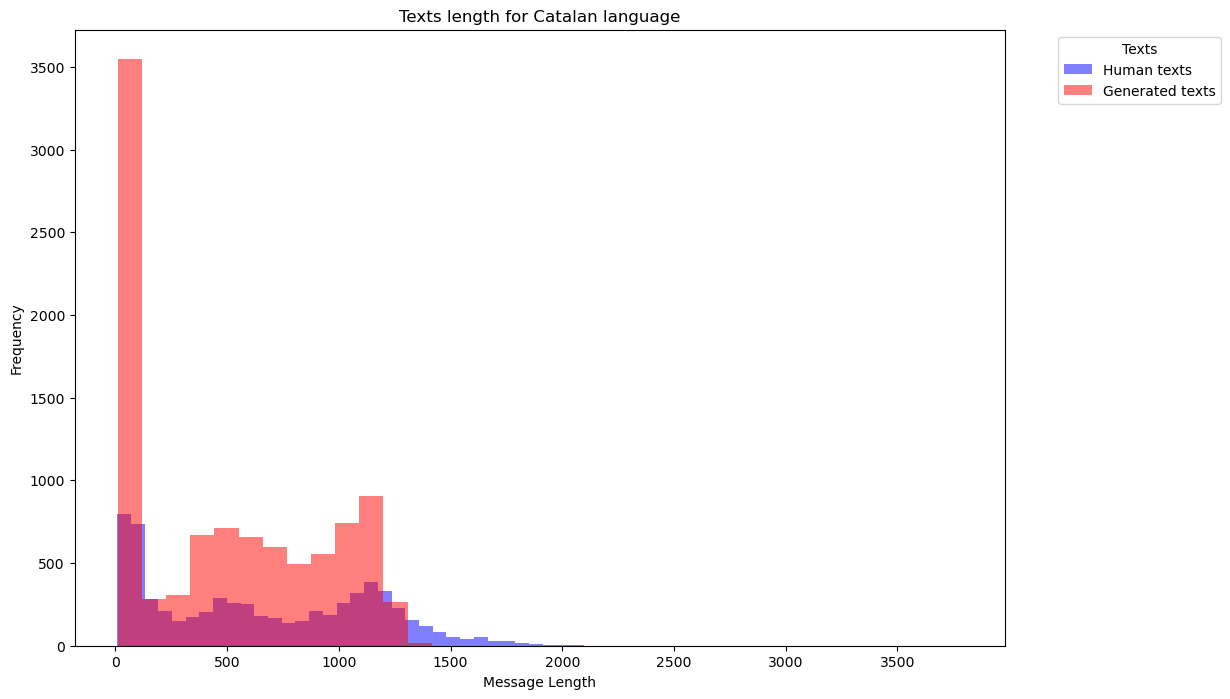

Catalan -> Average Human text length: 655.2036637931035
Catalan -> Average Computer text length: 496.70847875179635



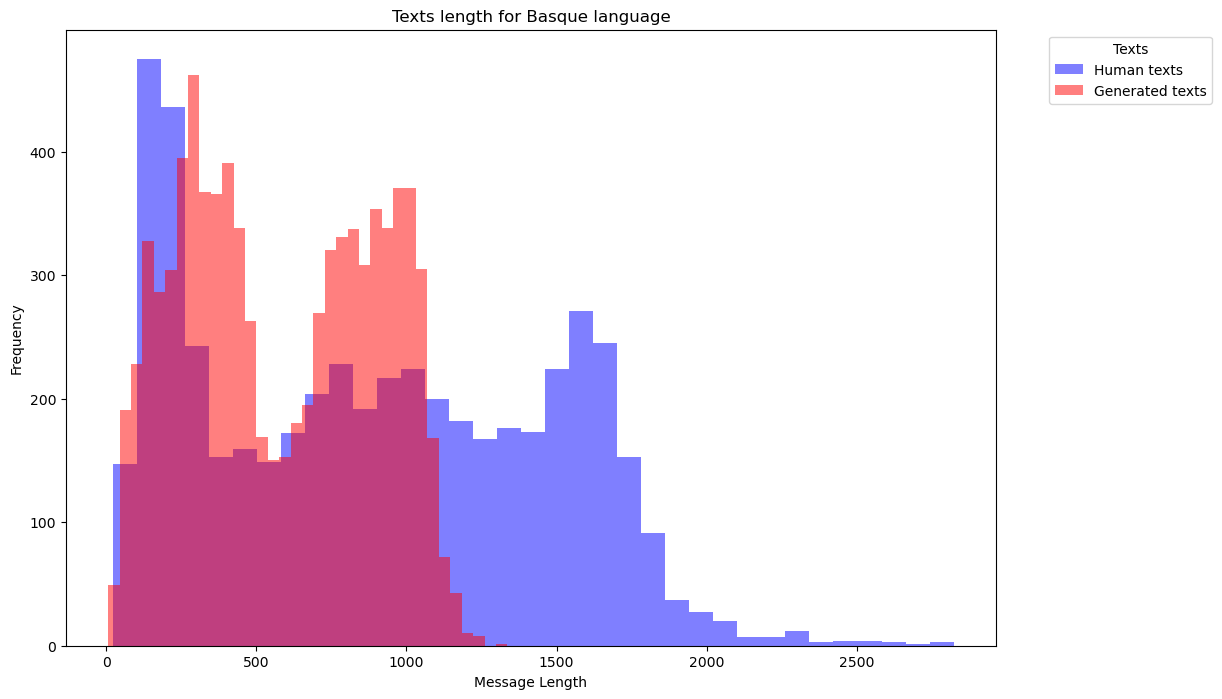

Basque -> Average Human text length: 895.8768217209024
Basque -> Average Computer text length: 581.2141075881724



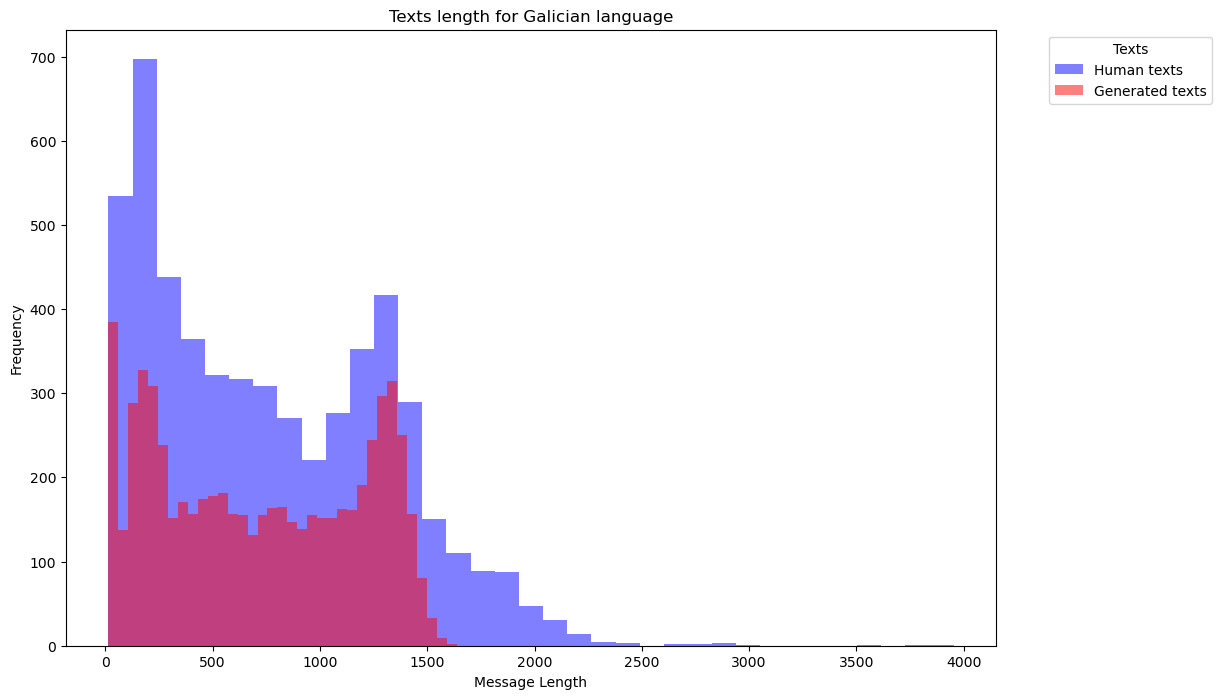

Galician -> Average Human text length: 771.2608370702541
Galician -> Average Computer text length: 721.8810776343057



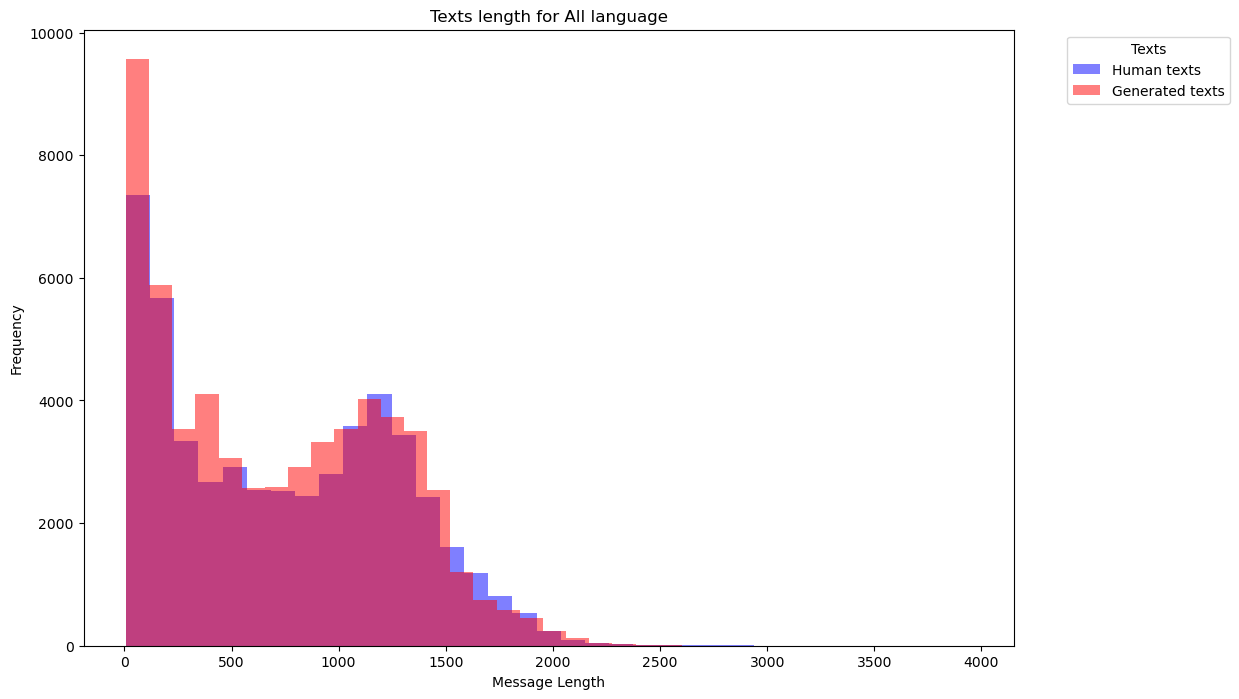

All -> Average Human text length: 747.2836623350858
All -> Average Computer text length: 718.029081125544



In [62]:
train = [(train_en_preprocessed, 'English'), (train_es_preprocessed, 'Spanish'), (train_pt_preprocessed, 'Portuguese'),
        (train_ca_preprocessed, 'Catalan'), (train_eu_preprocessed, 'Basque'), (train_gl_preprocessed, 'Galician'),
        (train_preprocessed, 'All')]

for train_data, lan in train:
    plot_length(train_data, lan)

In [63]:
def plot_common_words(corpus, type, lan):
    if type=='human':
        words = corpus[corpus.label == 0]['clean_text'].apply(lambda x: x.split())
    elif lan=='Portuguese' and type!='human':
#         w = corpus[corpus.label==1].clean_text.to_list()
#         words = []

#         for line in w:
#             if type(line)!=float and type(line)!=str:
#                 for x in line.split():
#                     words.append(x)
        return
    else:
        words = corpus[corpus.label == 1]['clean_text'].apply(lambda x: x.split())
    

    ham_words= Counter()
    for msg in words:
        ham_words.update(msg)
        
    print(ham_words.most_common(50))
        
    common_words = [word[0] for word in ham_words.most_common(20)]
    word_counts = [word[1] for word in ham_words.most_common(20)]
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(common_words, word_counts, color='skyblue')
    plt.title(f'Top 20 Most Common Words in {type} {lan} texts Labeled Data')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

[('said', 10415), ('would', 5365), ('one', 5347), ('mr', 3895), ('also', 3590), ('people', 3494), ('first', 3251), ('time', 3054), ('could', 2988), ('new', 2877), ('like', 2869), ('two', 2743), ('well', 2311), ('see', 2212), ('made', 2164), ('years', 2142), ('good', 2105), ('may', 2073), ('much', 1938), ('know', 1852), ('last', 1807), ('book', 1796), ('year', 1789), ('many', 1747), ('little', 1720), ('man', 1717), ('say', 1683), ('great', 1665), ('get', 1645), ('come', 1609), ('work', 1587), ('go', 1579), ('make', 1576), ('dont', 1539), ('back', 1539), ('never', 1512), ('way', 1497), ('told', 1495), ('government', 1492), ('day', 1484), ('think', 1468), ('life', 1457), ('found', 1419), ('three', 1405), ('world', 1396), ('since', 1392), ('take', 1388), ('part', 1368), ('must', 1329), ('long', 1311)]


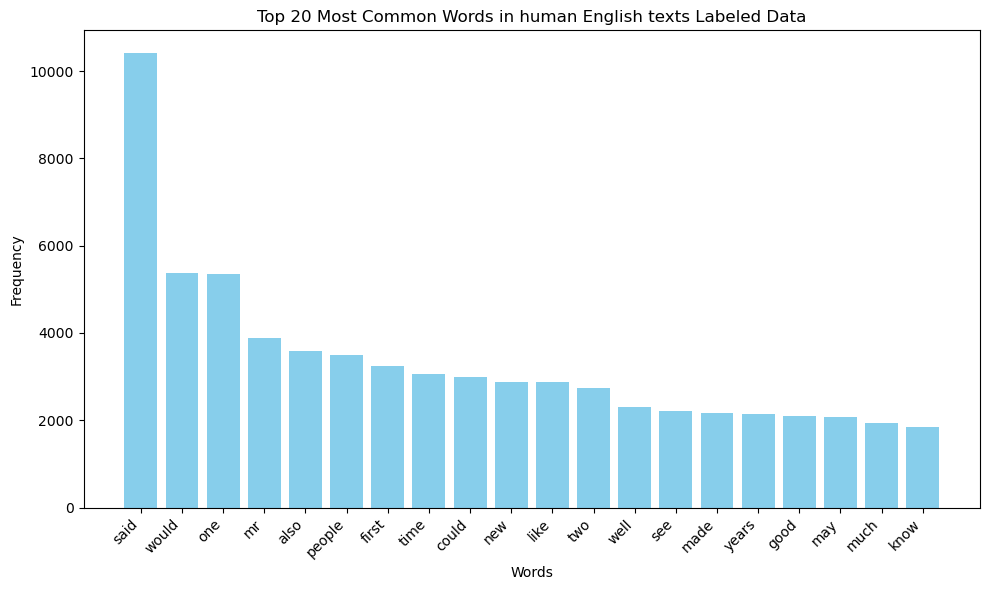

[('also', 9404), ('said', 7364), ('one', 5995), ('would', 5598), ('new', 4666), ('could', 4203), ('time', 4112), ('including', 3602), ('made', 3549), ('people', 3473), ('many', 3390), ('help', 3295), ('life', 3249), ('however', 3224), ('like', 3201), ('known', 3193), ('man', 3153), ('first', 3054), ('world', 3033), ('work', 2971), ('mr', 2772), ('found', 2760), ('years', 2706), ('way', 2677), ('government', 2626), ('several', 2553), ('see', 2507), ('make', 2504), ('couldnt', 2497), ('eyes', 2476), ('local', 2474), ('significant', 2441), ('two', 2427), ('back', 2385), ('home', 2264), ('family', 2193), ('may', 2177), ('despite', 2174), ('city', 2151), ('knew', 2144), ('around', 2141), ('take', 2135), ('community', 2115), ('come', 2090), ('well', 2056), ('day', 2012), ('place', 2008), ('young', 2002), ('face', 1995), ('voice', 1912)]


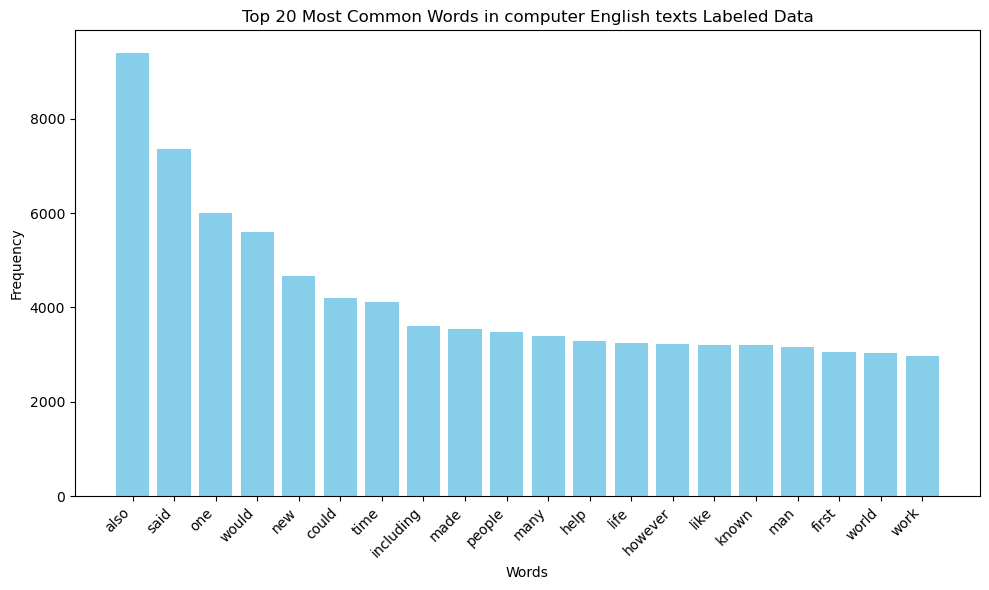

[('años', 3548), ('dijo', 2859), ('hotel', 2559), ('vez', 2464), ('después', 2343), ('mundo', 2263), ('final', 2218), ('así', 2076), ('parte', 2067), ('siempre', 1864), ('tiempo', 1831), ('año', 1777), ('solo', 1729), ('ahora', 1701), ('mejor', 1695), ('personas', 1691), ('quizás', 1679), ('país', 1679), ('puede', 1668), ('vida', 1668), ('primera', 1659), ('día', 1634), ('según', 1621), ('lugar', 1613), ('gran', 1606), ('servicio', 1599), ('mismo', 1558), ('casa', 1538), ('mientras', 1534), ('aunque', 1511), ('unidos', 1479), ('hacer', 1448), ('interese', 1447), ('excelente', 1438), ('hace', 1421), ('ciudad', 1419), ('hacia', 1368), ('momento', 1364), ('tres', 1347), ('familia', 1344), ('comida', 1323), ('menos', 1278), ('gobierno', 1277), ('presidente', 1251), ('historia', 1239), ('luego', 1211), ('cuenta', 1194), ('tras', 1192), ('forma', 1190), ('entonces', 1170)]


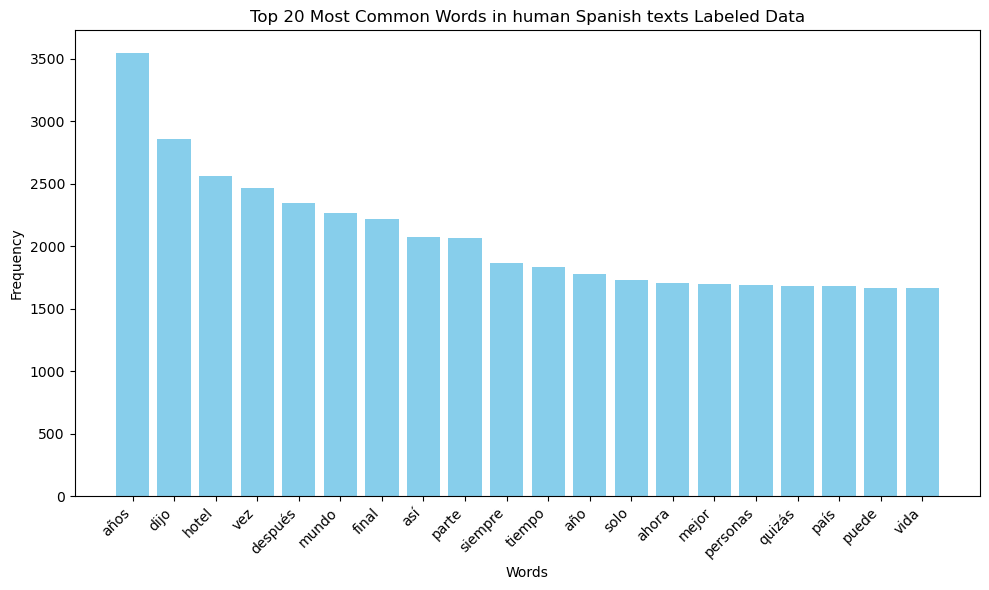

[('hotel', 3287), ('mundo', 2927), ('embargo', 2875), ('vida', 2864), ('ciudad', 2862), ('además', 2691), ('puede', 2547), ('siempre', 2478), ('años', 2449), ('momento', 2397), ('gran', 2364), ('mientras', 2355), ('lugar', 2237), ('vez', 2130), ('personal', 2112), ('solo', 2106), ('historia', 2032), ('país', 2007), ('después', 1964), ('parte', 1954), ('aunque', 1911), ('día', 1832), ('dijo', 1823), ('pesar', 1786), ('tiempo', 1783), ('personas', 1765), ('habitación', 1703), ('importante', 1688), ('podía', 1654), ('así', 1592), ('ahora', 1479), ('gobierno', 1450), ('hombre', 1443), ('cuenta', 1423), ('unidos', 1422), ('cómo', 1414), ('encuentra', 1402), ('hacia', 1397), ('hacer', 1351), ('pueden', 1336), ('amable', 1315), ('casa', 1289), ('trabajo', 1271), ('región', 1268), ('familia', 1251), ('según', 1182), ('forma', 1164), ('año', 1158), ('ojos', 1152), ('carrera', 1129)]


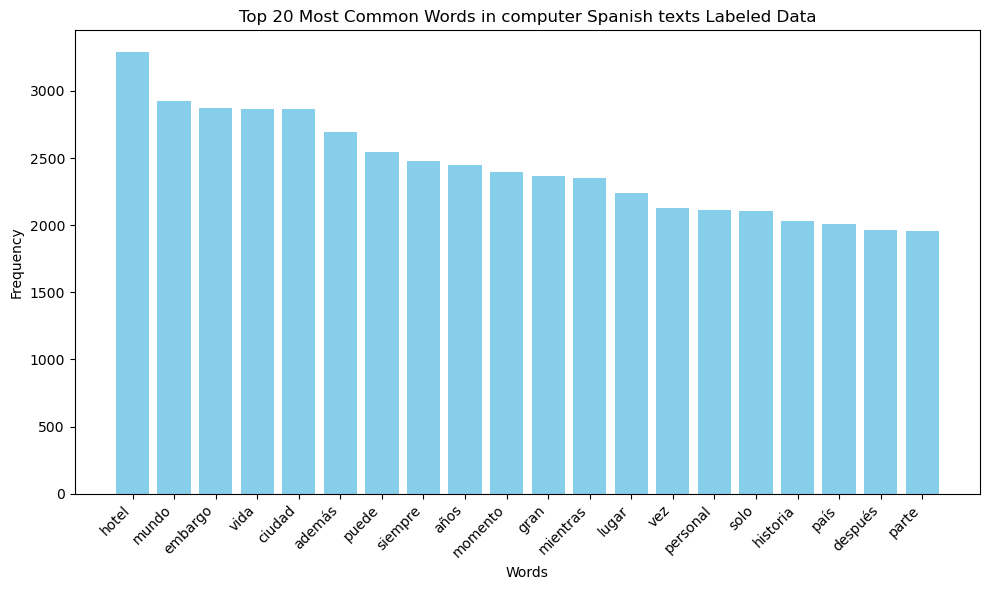

[('disse', 3506), ('ainda', 2962), ('anos', 2790), ('dois', 1993), ('segundo', 1937), ('brasil', 1929), ('casa', 1884), ('dia', 1884), ('bem', 1818), ('país', 1755), ('onde', 1725), ('tempo', 1718), ('pessoas', 1666), ('governo', 1637), ('vez', 1621), ('então', 1517), ('ano', 1502), ('agora', 1458), ('parte', 1442), ('grande', 1409), ('cidade', 1396), ('vida', 1385), ('presidente', 1370), ('tudo', 1365), ('outros', 1363), ('mundo', 1323), ('pouco', 1305), ('tão', 1295), ('assim', 1284), ('unidos', 1278), ('dias', 1272), ('primeiro', 1263), ('produto', 1260), ('três', 1255), ('apenas', 1237), ('outro', 1231), ('menos', 1214), ('duas', 1210), ('homem', 1203), ('primeira', 1188), ('diz', 1180), ('fim', 1178), ('fazer', 1135), ('olhos', 1119), ('mil', 1095), ('após', 1052), ('ver', 1030), ('sempre', 1027), ('maior', 1019), ('vai', 1014)]


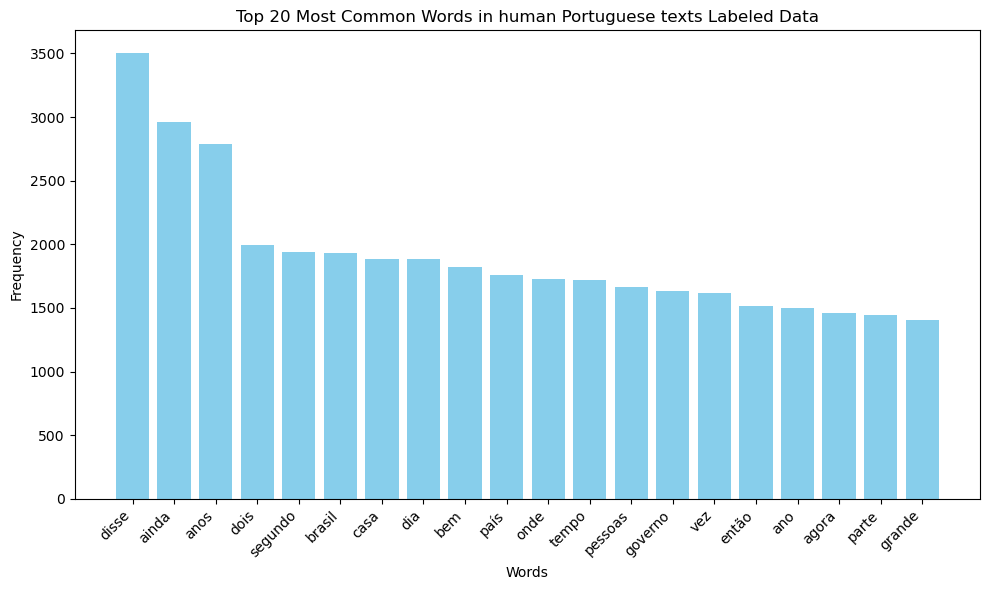

[('anys', 1721), ('catalunya', 1575), ('segons', 1559), ('persones', 1475), ('govern', 1378), ('cap', 1377), ('sha', 1306), ('barcelona', 1296), ('part', 1176), ('referències', 1122), ('fet', 1110), ('duna', 1102), ('lany', 1083), ('població', 1058), ('té', 977), ('gran', 948), ('president', 906), ('fou', 892), ('tres', 859), ('ciutat', 823), ('pot', 792), ('lestat', 785), ('dues', 780), ('ara', 750), ('família', 717), ('espanyol', 708), ('primera', 694), ('sant', 671), ('nou', 627), ('generalitat', 608), ('nom', 606), ('habitatges', 597), ('grup', 596), ('nova', 594), ('dia', 582), ('lloc', 578), ('tenia', 574), ('dones', 569), ('passat', 563), ('dit', 557), ('banda', 554), ('daquest', 554), ('forma', 545), ('general', 540), ('davant', 536), ('manera', 530), ('cas', 524), ('quatre', 509), ('temps', 501), ('municipi', 497)]


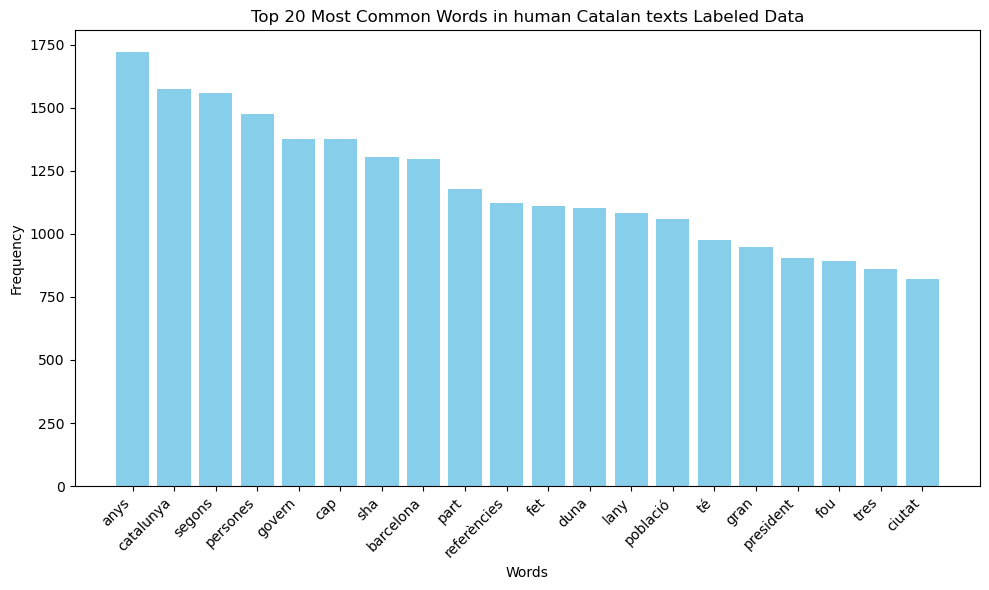

[('catalunya', 2593), ('gran', 2506), ('ara', 2267), ('govern', 2224), ('vida', 2195), ('té', 1920), ('ciutat', 1896), ('barcelona', 1722), ('cap', 1659), ('part', 1474), ('segons', 1452), ('món', 1415), ('pot', 1376), ('català', 1350), ('fet', 1349), ('sha', 1339), ('anys', 1304), ('temps', 1266), ('lloc', 1263), ('història', 1254), ('poble', 1145), ('president', 1124), ('nit', 1076), ('catalana', 1050), ('duna', 1043), ('dia', 1041), ('cor', 1024), ('persones', 1008), ('sempre', 978), ('lany', 936), ('partit', 919), ('diverses', 915), ('diferents', 899), ('important', 883), ('terra', 872), ('generalitat', 861), ('zona', 843), ('situació', 835), ('dir', 827), ('mai', 826), ('segle', 813), ('troba', 811), ('amor', 809), ('sol', 794), ('política', 784), ('moment', 783), ('sant', 772), ('seguretat', 771), ('diversos', 770), ('cel', 746)]


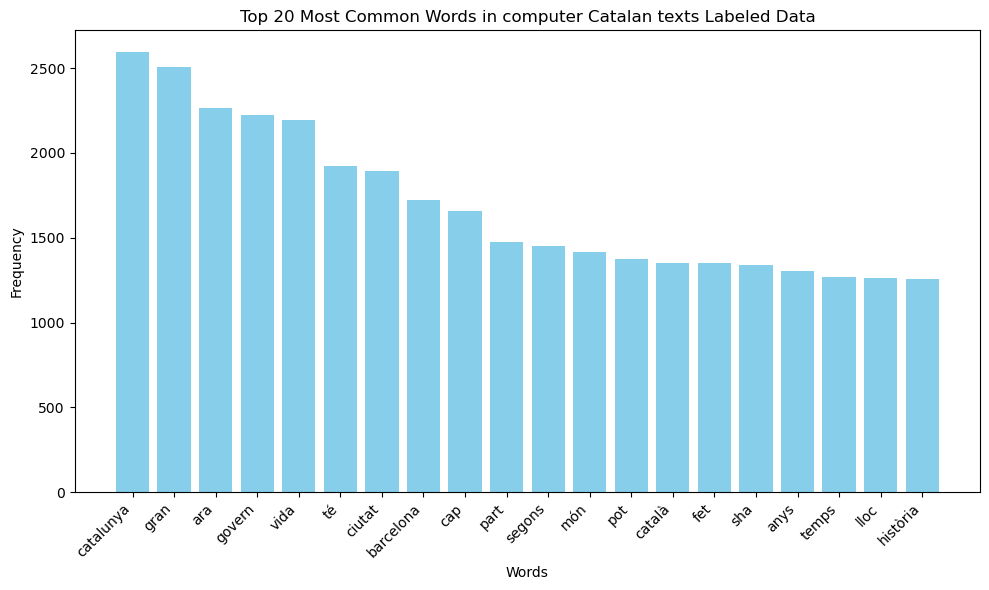

[('zeuden', 2087), ('egiten', 1743), ('bi', 1621), ('izango', 1587), ('behar', 1562), ('nahi', 1507), ('zituzten', 1459), ('kanpo', 1267), ('dut', 1151), ('estekak', 1151), ('zion', 1118), ('euskal', 1096), ('duen', 1070), ('ari', 1064), ('oso', 1019), ('pertsona', 1010), ('gainera', 972), ('gehiago', 954), ('nire', 949), ('etxek', 903), ('bizi', 902), ('hartu', 897), ('zegoen', 883), ('eman', 850), ('urte', 848), ('hiru', 847), ('etxebizitza', 830), ('diren', 825), ('gure', 802), ('zela', 800), ('lan', 787), ('joan', 775), ('duten', 743), ('egiteko', 735), ('bakarrik', 724), ('2007an', 711), ('azken', 694), ('nuen', 675), ('gizon', 667), ('erreferentziak', 657), ('dugu', 649), ('ezin', 648), ('1', 646), ('bertan', 623), ('bigarren', 608), ('hainbat', 607), ('biztanle', 606), ('emakume', 592), ('dituzten', 584), ('zuela', 582)]


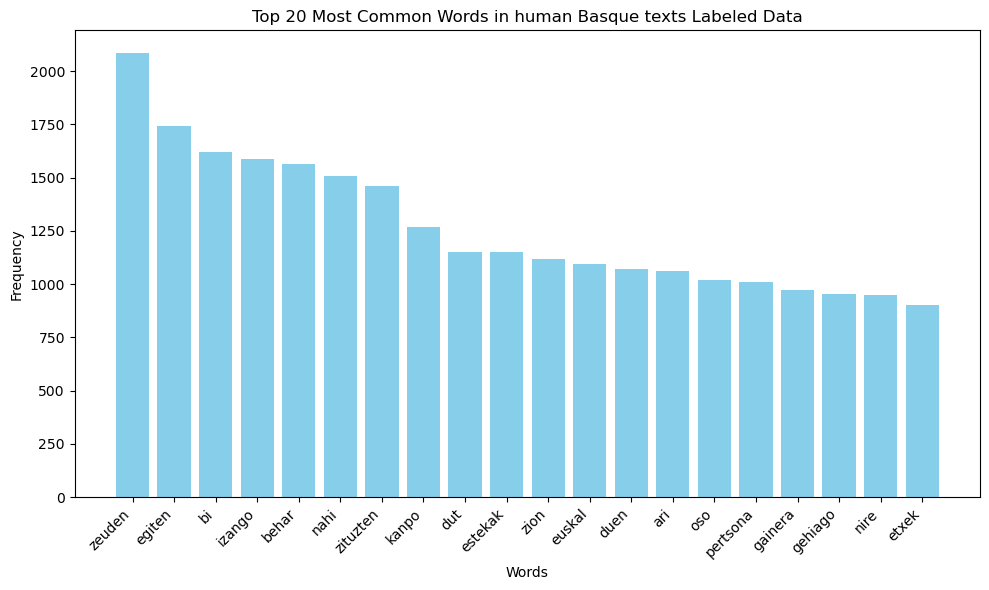

[('gure', 4552), ('euskal', 4353), ('izango', 3810), ('duen', 2873), ('nire', 2672), ('behar', 2594), ('egiten', 2378), ('hainbat', 2288), ('nahi', 2277), ('duzu', 2079), ('ezagutzen', 2051), ('oso', 1940), ('eman', 1794), ('dugu', 1672), ('dut', 1667), ('bilboko', 1662), ('bi', 1628), ('daude', 1617), ('duten', 1587), ('gehiago', 1529), ('zehar', 1413), ('ezin', 1412), ('aukera', 1399), ('herriko', 1398), ('bertan', 1376), ('dituen', 1298), ('dituzte', 1282), ('ematen', 1233), ('azken', 1204), ('euskara', 1201), ('dakit', 1162), ('buruzko', 1121), ('diren', 1066), ('gora', 1048), ('lan', 1041), ('zure', 1031), ('parte', 1023), ('hartu', 998), ('beti', 908), ('kultura', 892), ('handia', 887), ('ahal', 887), ('bakarrik', 884), ('izena', 883), ('arteko', 882), ('hiru', 881), ('dagoen', 873), ('nuen', 869), ('ari', 868), ('eusko', 864)]


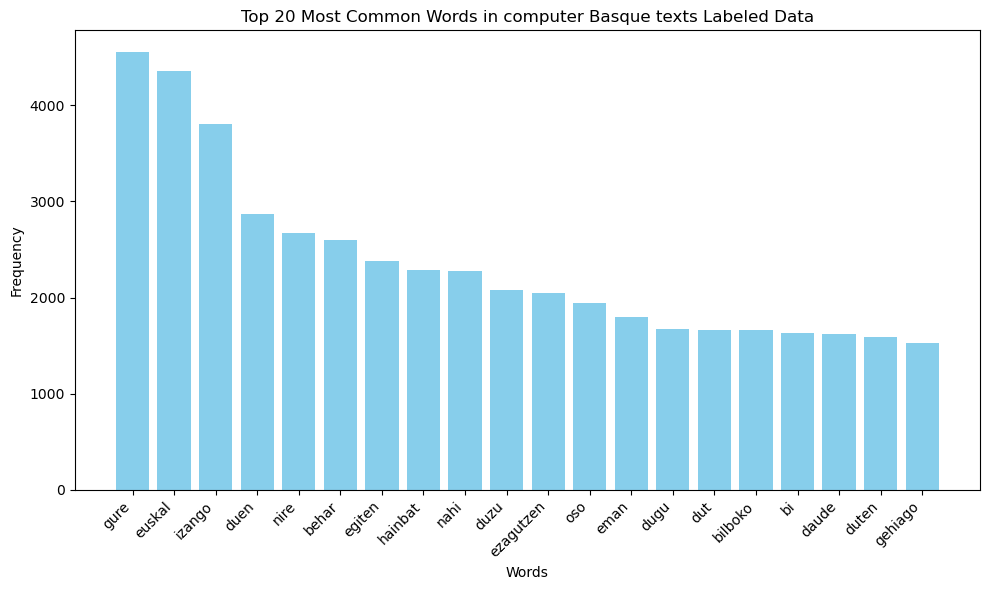

[('máis', 4089), ('súa', 3783), ('tamén', 3152), ('á', 3140), ('ano', 1499), ('lugares', 1496), ('concello', 1445), ('xa', 1369), ('anos', 1329), ('lugar', 1193), ('galicia', 1183), ('ás', 1151), ('parte', 1074), ('parroquias', 1038), ('así', 1020), ('onde', 1002), ('outros', 971), ('súas', 952), ('segundo', 950), ('galego', 939), ('véxase', 925), ('aínda', 907), ('notas', 880), ('ata', 854), ('parroquia', 850), ('despois', 801), ('dende', 792), ('sen', 784), ('ó', 776), ('primeira', 760), ('dous', 756), ('cidade', 753), ('día', 734), ('historia', 731), ('primeiro', 725), ('nome', 681), ('dúas', 672), ('persoas', 669), ('gran', 646), ('tiña', 640), ('habitantes', 626), ('vez', 626), ('tres', 616), ('grupo', 616), ('ademais', 589), ('forma', 579), ('mundo', 572), ('ligazóns', 561), ('externas', 543), ('traballo', 537)]


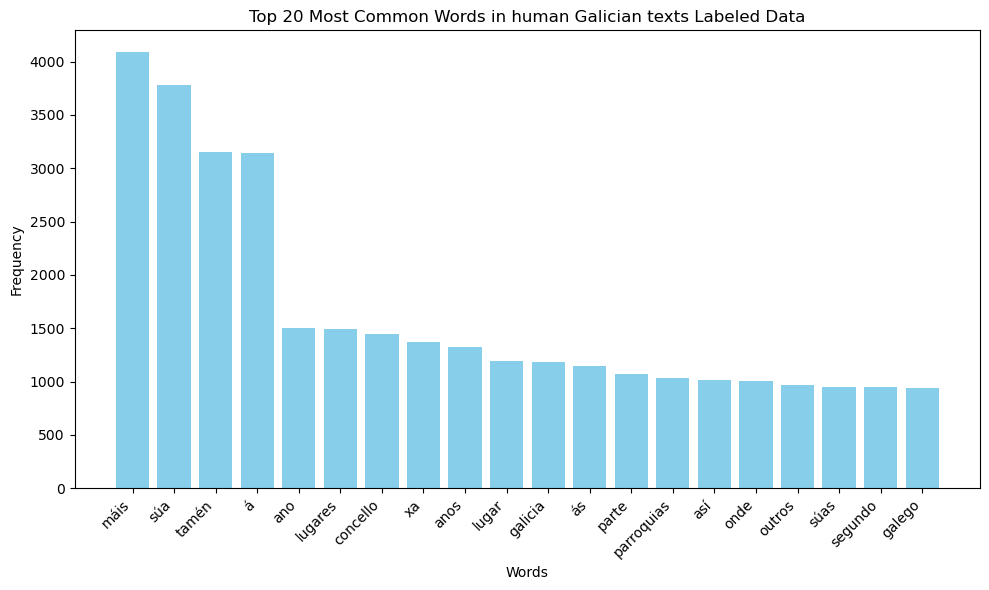

[('súa', 7104), ('máis', 5208), ('tamén', 3612), ('á', 3065), ('galicia', 2396), ('historia', 1733), ('vida', 1729), ('súas', 1580), ('ademais', 1546), ('onde', 1505), ('lugar', 1500), ('galega', 1478), ('concello', 1413), ('así', 1384), ('sen', 1364), ('xa', 1286), ('parroquia', 1257), ('galego', 1216), ('día', 1180), ('cultura', 1178), ('mundo', 1174), ('ano', 1172), ('cidade', 1171), ('importante', 1164), ('parte', 1151), ('gran', 1144), ('ás', 1129), ('anos', 1105), ('aínda', 1036), ('traballo', 1024), ('nova', 946), ('tempo', 932), ('sempre', 930), ('senón', 895), ('século', 892), ('zona', 832), ('san', 828), ('mar', 802), ('provincia', 792), ('desta', 785), ('segundo', 784), ('música', 764), ('diferentes', 761), ('forma', 757), ('cultural', 756), ('amor', 753), ('persoas', 751), ('nome', 739), ('obra', 736), ('ata', 712)]


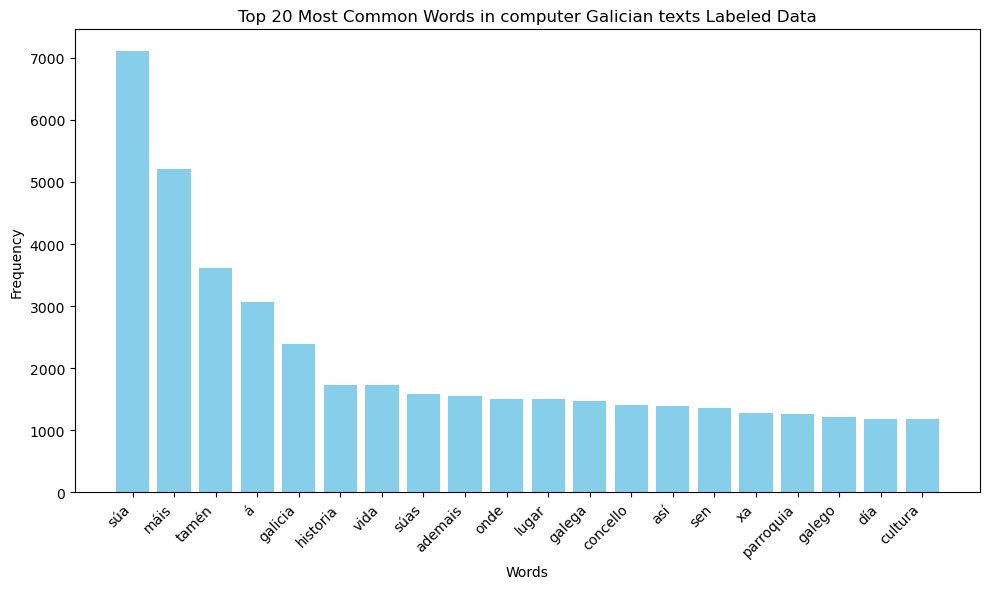

[('said', 10432), ('one', 5468), ('would', 5368), ('parte', 5067), ('vez', 4715), ('casa', 4301), ('país', 4290), ('mundo', 4181), ('anos', 4136), ('máis', 4105), ('mr', 4013), ('vida', 3937), ('súa', 3811), ('final', 3634), ('also', 3591), ('años', 3562), ('1', 3531), ('people', 3519), ('disse', 3507), ('segundo', 3442), ('lugar', 3399), ('new', 3365), ('á', 3322), ('first', 3289), ('time', 3267), ('gran', 3247), ('tamén', 3228), ('2', 3115), ('así', 3098), ('unidos', 3036), ('ano', 3029), ('forma', 3015), ('ainda', 2998), ('could', 2991), ('bbc', 2922), ('presidente', 2919), ('like', 2916), ('hotel', 2912), ('tres', 2870), ('menos', 2868), ('dijo', 2859), ('two', 2772), ('onde', 2735), ('dia', 2613), ('3', 2588), ('part', 2556), ('grupo', 2519), ('10', 2512), ('ver', 2466), ('brasil', 2444)]


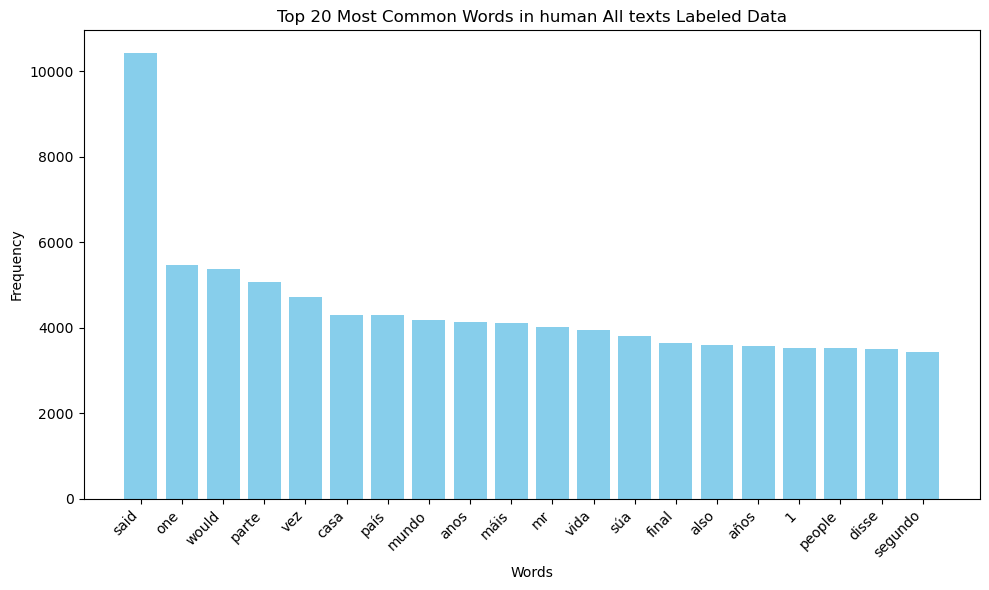

[('vida', 9946), ('also', 9566), ('said', 7406), ('súa', 7210), ('mundo', 6403), ('one', 6165), ('gran', 6039), ('would', 5710), ('país', 5556), ('máis', 5315), ('parte', 5234), ('new', 5004), ('local', 4758), ('lugar', 4638), ('vez', 4618), ('gure', 4557), ('euskal', 4365), ('historia', 4365), ('time', 4340), ('importante', 4292), ('could', 4244), ('momento', 4225), ('cidade', 4072), ('ainda', 3976), ('izango', 3810), ('onde', 3786), ('sempre', 3771), ('casa', 3733), ('hotel', 3713), ('forma', 3708), ('including', 3656), ('tamén', 3636), ('made', 3594), ('people', 3586), ('many', 3447), ('man', 3378), ('help', 3351), ('life', 3336), ('like', 3317), ('part', 3304), ('known', 3283), ('however', 3271), ('world', 3210), ('anos', 3142), ('first', 3141), ('amor', 3131), ('cultura', 3109), ('á', 3082), ('día', 3043), ('work', 3023)]


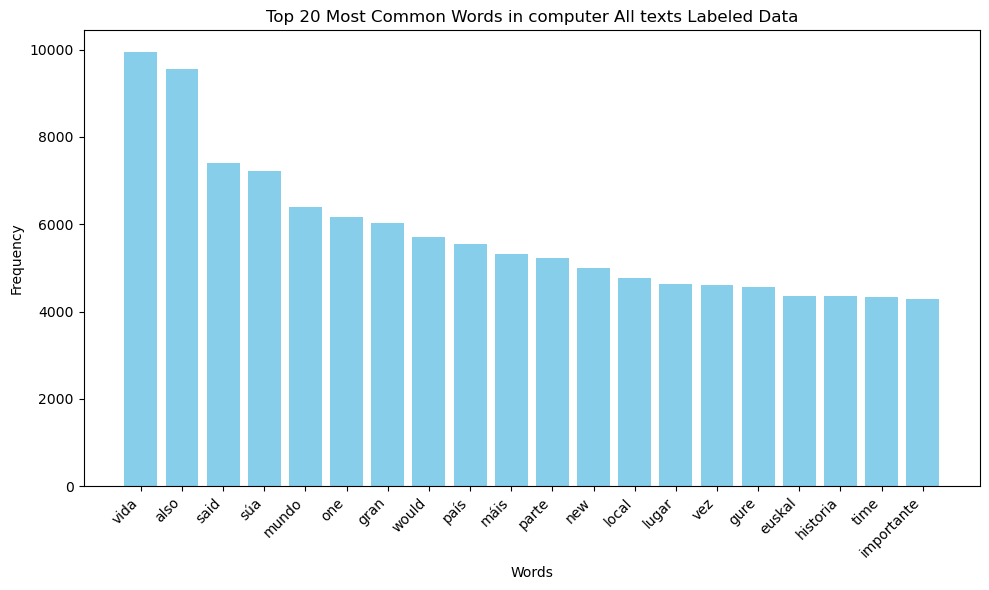

In [64]:
# !jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10

for train_data, lan in train:
    plot_common_words(train_data, 'human', lan)
    plot_common_words(train_data, 'computer', lan)


## Validation

In [65]:
def train_test(corpus, test):
    x_train, x_test, y_train, y_test = train_test_split(corpus.loc[:'clean_text'],
                                                       corpus['label'], test_size=test, random_state=42)
    print(x_train.shape)
    print(x_test.shape)
    print(y_train.shape)
    print(y_test.shape)
          
    return x_train['clean_text'], x_test['clean_text'], y_train, y_test

In [66]:
x_train_en, x_test_en, y_train_en, y_test_en = train_test(train_en_preprocessed, 0.2)
x_train_es, x_test_es, y_train_es, y_test_es = train_test(train_es_preprocessed, 0.2)
x_train_ca, x_test_ca, y_train_ca, y_test_ca = train_test(train_ca_preprocessed, 0.2)
x_train_eu, x_test_eu, y_train_eu, y_test_eu = train_test(train_eu_preprocessed, 0.2)
x_train_gl, x_test_gl, y_train_gl, y_test_gl = train_test(train_gl_preprocessed, 0.2)
x_train_pt, x_test_pt, y_train_pt, y_test_pt = train_test(train_pt_preprocessed, 0.2)


(20584, 6)
(5146, 6)
(20584,)
(5146,)
(17746, 6)
(4437, 6)
(17746,)
(4437,)
(12990, 6)
(3248, 6)
(12990,)
(3248,)
(10744, 6)
(2686, 6)
(10744,)
(2686,)
(9300, 6)
(2325, 6)
(9300,)
(2325,)
(15642, 6)
(3911, 6)
(15642,)
(3911,)


In [67]:
x_train, x_test, y_train, y_test = train_test(train_preprocessed, 0.2)
x_train

(87007, 6)
(21752, 6)
(87007,)
(21752,)


76700     céltigos ortigueira céltigos pequena localizac...
96703     nobek nazioarteko olinpiar batzordea ezarritak...
43159     momento llegué hotel trataron cortesía amabili...
71450     ángulo inscrito concepto fundamental xeometría...
85559     irmá fremosa sorriso rosa ollos cheos lus amen...
                                ...                        
55313     última versión adaptación cinematográfica clás...
77464     postia pappi jaakobille filme finlandés 2009 e...
104546    lactococcus gênero bactérias gram positivas no...
864       jimi heselden 62 crashed river wharfe riding v...
15909     juan felipe osorio reconocido personaje país o...
Name: clean_text, Length: 87007, dtype: object

## Minable view

In [68]:
from sklearn.feature_extraction.text import CountVectorizer


# Bag of Words

vect = CountVectorizer()

# Bag of Words (Term-frequency)
## Represent the text considering the term frequency of words
### considering the frequency of the terms (binary=False), and removing stopwords (stop_words="english")

term_frequency = CountVectorizer(binary=False)


# Bigrams of Words (Term-Frequency)
## Represent the text considering the frequency of pairs of adjacent words.
### considering the frequency of the bigrams of words (binary=False), and removing stopwords (stop_words="english")

two_gram_tf = CountVectorizer(analyzer='word', ngram_range=(2,2), binary=False)


In [69]:
def text_representations(train_corpus, test_corpus, model):
    # Learn training data vocabulary, then use it to create a document-term matrix
    x_train_tr = model.fit_transform(train_corpus)
    
    # Examine the document-term matrix
    print("Training document-term matrix:")
    print("Shape:", x_train_tr.shape)
    print("Density:", x_train_tr.nnz / (x_train_tr.shape[0] * x_train_tr.shape[1]))
    
    vocab_size = len(model.vocabulary_)
    print("Tamaño del vocabulario:", vocab_size)
    
    # Transform testing data (using fitted vocabulary) into a document-term matrix
    x_test_tr = model.transform(test_corpus)
    
    print("\nTesting document-term matrix:")
    print("Shape:", x_test_tr.shape)
    print("Density:", x_test_tr.nnz / (x_test_tr.shape[0] * x_test_tr.shape[1]))
    
    return x_train_tr, x_test_tr

In [70]:
x_train_v, x_test_v = text_representations(x_train, x_test, vect)

Training document-term matrix:
Shape: (87007, 498409)
Density: 0.00014535234762006786
Tamaño del vocabulario: 498409

Testing document-term matrix:
Shape: (21752, 498409)
Density: 0.0001391202274560048


In [71]:
# from sklearn.feature_extraction.text import TfidfTransformer

# tfidf_transformer = TfidfTransformer()
# tfidf_transformer.fit(X_train1_dtm)
# tfidf_transformer.transform(X_train1_dtm)

In [72]:
# from sklearn.pipeline import Pipeline
# import numpy as np
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer

# pipe = Pipeline([('count', CountVectorizer(stop_words="english", binary=False)), ('tfid', TfidfTransformer(use_idf=True))])
# x_train_tfidf=pipe.fit_transform(x_train).toarray()
# x_test_tfidf = vect.transform(x_test)


In [73]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()
# x_train_eu_tfidf = vectorizer.fit_transform(x_train_eu)
# x_test_eu_tfidf = vectorizer.transform(x_test_eu)

## Models and evaluation

In [74]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

### Naive bayes

In [75]:
# train the model using X_train1_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train1_dtm, y_train_en)

NameError: name 'X_train1_dtm' is not defined

#### Evaluation

In [76]:
from sklearn import metrics

# make class predictions for X_test_dtm
y_test_en_pred_mb = nb.predict(X_test1_dtm)

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test_en, y_test_en_pred_mb))

# print the confusion matrix
print("=======Confusion Matrix===========")
metrics.confusion_matrix(y_test_en, y_test_en_pred_mb)

NameError: name 'X_test1_dtm' is not defined

In [ ]:
from sklearn.metrics import f1_score
print(f"F1-score for Naive Bayes model: {f1_score(y_test_en, y_test_en_pred_mb, average='macro')}")

### Logistic regresion

In [ ]:
# import an instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')

# train the model using X_train_dtm
%time logreg.fit(X_train1_dtm, y_train_en)

#### Evaluation

In [ ]:
# make class predictions for X_test_dtm
y_test_en_pred_lr = logreg.predict(X_test1_dtm)

# calculate predicted probabilities for X_test_dtm (well calibrated)
y_test_en_prob_lr = logreg.predict_proba(X_test1_dtm)[:, 1]
y_test_en_prob_lr

In [ ]:
# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test_en, y_test_en_pred_lr))

# print the confusion matrix
print("=======Confusion Matrix===========")
print(metrics.confusion_matrix(y_test_en, y_test_en_pred_lr))

# calculate AUC
print("=======ROC AUC Score===========")
print(metrics.roc_auc_score(y_test_en, y_test_en_pred_lr))

In [ ]:
from sklearn.metrics import f1_score
print(f"F1-score for Logistic Regression model: {f1_score(y_test_en, y_test_en_pred_lr, average='macro')}")